<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>

<br>

<br>
Weriko
<br>
AndresTY
<br>
<br>

<br>

<br>
</FONT>
</p>

## Introducción

Python is one of the most used computational tools in the scientific area, due to two factors. Python has a readable structure that allows for a fast development cycle. On the other hand, Python has the ability to use modules in low level environments such as C/C++ and Fortran for accessing internal components.

Since python is an interpreted language, low-level tasks tend to be slow, so resources such as low-level loops are unfeasible. This is why NumPy can help on eliminating the need to use such loops. However, sometimes there are speedups that can't be easily obtained with just Numpy, so using tools like Cython can be of great help

Fundamentally, Cython will compile Python code directly into C, then link it into Python for use. With this, Cython allows to use the execution speed of C in a Python code.



## Neural Network (gradient descent)

The concept of neural networks has been around for some time now, being proposed for the first time in the 1940s. They are inspired in the structure and inner workings of the human brain, reason for the name. 

The general structure of a basic neural network is:

| 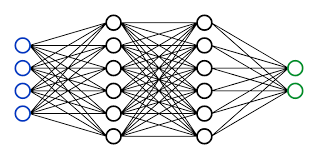 |
|:--:| 
| *(Zhou, v. 2019)*|

Where it has an input layer, hidden layers and an output layer

The operations to get from an input X to an output y are defined as follows (forward propagation):
________

X is a vector containing the values of previous layer

W is a matrix containing the weights of the $L_{n-1},L_{n}$ forward step

a(x) is an activation function:
* $sigmoid(x) = \frac{1}{(1+e^{-x})}$
* $relu(x) = max(0,x)$
* $tanh(x) = \frac{(e^x – e^-x)} {(e^x + e^-x)}$
* $softmax(Z_n) = \frac{e^{z_j}}{\sum_{k=1}^{K}{e^{Z_k}}} $  where Z  is a K-dimensional vector

    
$L_n = a(XW^{n-1})$
________

To learn the weights backpropagation is done, in this case using gradient descent:
agrad_n is the gradient of the nth activation function with respect to W or b 
lr is the learning rate

$dz = agrad_n(d_{an-1},z) $

$d_a{n} = W^Tdz*$

$W_n =  W_n-d_a*lr$


_______

A critical step for optimization appears on the matrix multiplication, especially on the backpropagation step.


This process was implemented first using pure python for loops, and second using cython optimized for loops. Some other gains were obtained by defining the types of the variables used.







In [3]:
from Fast.NeuralNetwork import NeuralNetwork as CNeuralNetwork
from Pure.NeuralNetwork import NeuralNetwork as PNeuralNetwork
from utils.Tester import Tester, Binder
from utils.timeutils import timeit 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import time

In [11]:

path = "titanic3.csv"
df = pd.read_csv(path)
df["sex"] = df["sex"].replace({"female":1,"male":0})
X = df[["pclass","sex","age","fare"]].to_numpy(dtype=int)

y = df["survived"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.15, random_state=42)
pNN = PNeuralNetwork(np.array((4,6,4,1)),
                   np.array(("relu","relu","sigmoid"),dtype=str),
                   lr =0.001)
cNN = CNeuralNetwork(np.array((4,6,4,1)),
                   np.array(("relu","relu","sigmoid"),dtype=str),
                   lr =0.001)

In [12]:
cnnfit = Binder(cNN.fit, name="Cython Fit")
pnnfit = Binder(pNN.fit, name="Python Fit")
tester = Tester([cnnfit, pnnfit])

In [13]:
filename = f"results/resultnn{str(time.time())}.json"
tester.test(loads=[([X_train, y_train], {"epochs":10}),
                   ([X_train, y_train], {"epochs":30}),
                  ([X_train, y_train], {"epochs":60}),
                  ([X_train, y_train], {"epochs":90}),
                  ([X_train, y_train], {"epochs":110})], iters = 1, 
                   show_names =["epochs=10","epochs=30", 
                                "epochs=60", "epochs=90", "epochs=110"], save_to_file = filename)

[{'Cython Fit_epochs=10': [0.002981901168823242],
  'Python Fit_epochs=10': [0.917003870010376]},
 {'Cython Fit_epochs=30': [0.007012605667114258],
  'Python Fit_epochs=30': [2.761996030807495]},
 {'Cython Fit_epochs=60': [0.014998674392700195],
  'Python Fit_epochs=60': [5.3809967041015625]},
 {'Cython Fit_epochs=90': [0.022008419036865234],
  'Python Fit_epochs=90': [7.993974685668945]},
 {'Cython Fit_epochs=110': [0.025997161865234375],
  'Python Fit_epochs=110': [9.889001607894897]}]

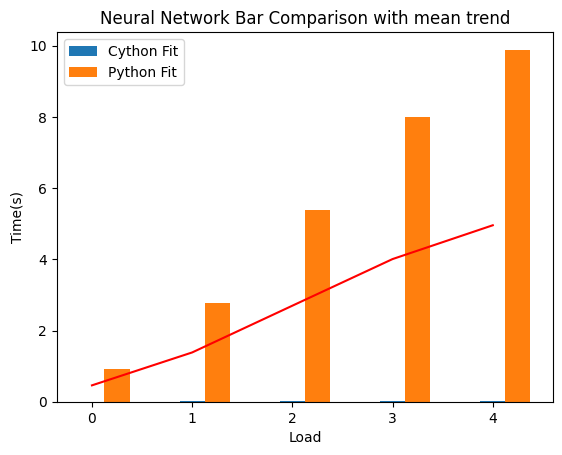

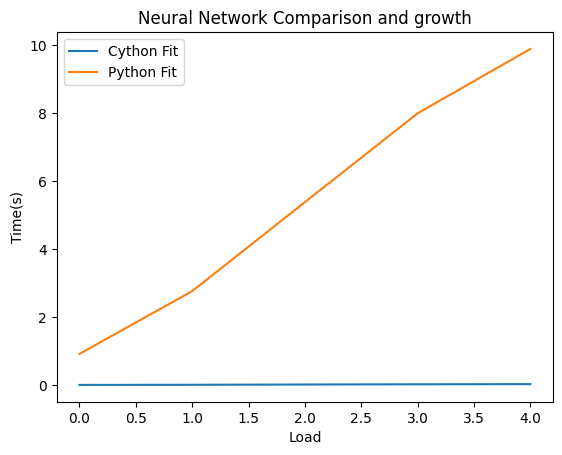

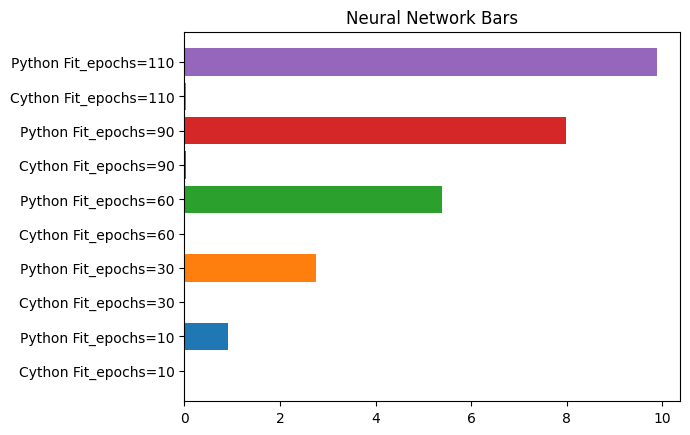

In [14]:
tester.plot(filename, "Neural Network")


We can conclude that there is a significative improvement in performance while using Cython over Python in this algorithm. For-loops in Python are notoriously slow when there are many iterations, and in typical matrix multiplication the complexity is of $O^3$, so many iterations will be requiered.
The biggest improvement in this case comes from using Cython (C) for-loops instead of Python ones.

# Find primes

A natural number is called a prime number or prime, if it is greater than 1 and cannot be written as the product of 2 natural numbers. A numbers that are not prime are called composite numbers. 

The concept of prime number is so important in the branches of mathematics that it has been generalized in various ways. As the prime elements in a ring, prime ideals, prime knots, among others. Similarly, its applications in mathematics extend to the concept of "relative primes" to define primitive roots of unity, the definition of a finite body, the definition of a stellated polygon of n sides and the definition of the canonical representation of a rational number. In turn, they are implemented in computation for the RSA algorithm. The security of this algorithm lies in the complexity of factoring a number into its prime factors.

In [7]:
from Fast.FindPrimes import find_primes as cfind_primes
from Pure.FindPrimes import find_primes as pfind_primes

In [10]:
#timeit(cfind_primes, 10000000)
filename = f"results/resultprimes{str(time.time())}.json"

cfind = Binder(cfind_primes, name="Cython primes")
pfind = Binder(pfind_primes, name="Python primes")
tester = Tester([cfind, pfind])
tester.test(loads=[([100000], {}),
                    ([300000], {}),
                   ([500000], {}),
                  ([1000000], {})], iters = 1, save_to_file = filename)

[{'Cython primes_0': [0.0060367584228515625],
  'Python primes_0': [0.012967348098754883]},
 {'Cython primes_1': [0.016995668411254883],
  'Python primes_1': [0.04403066635131836]},
 {'Cython primes_2': [0.02899932861328125],
  'Python primes_2': [0.07399296760559082]},
 {'Cython primes_3': [0.05900096893310547],
  'Python primes_3': [0.150007963180542]}]

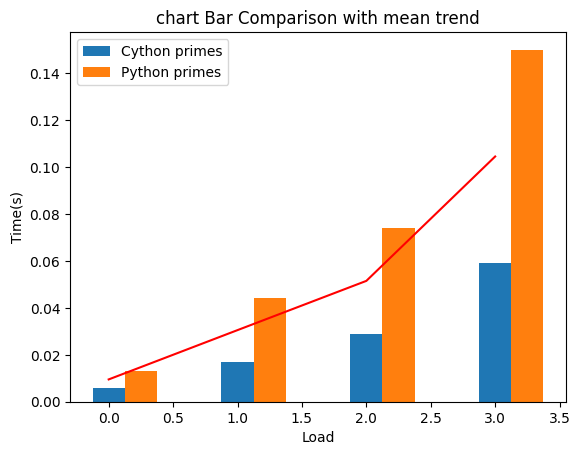

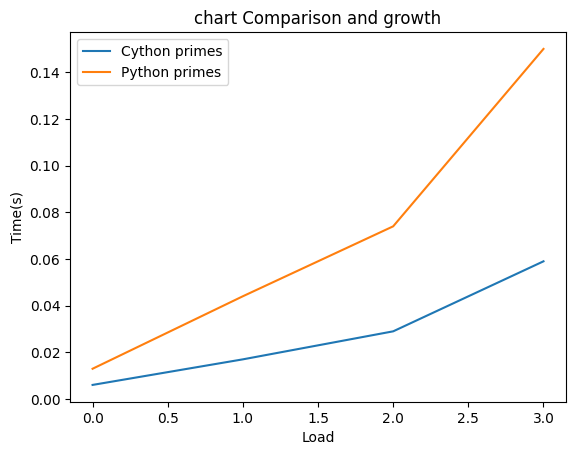

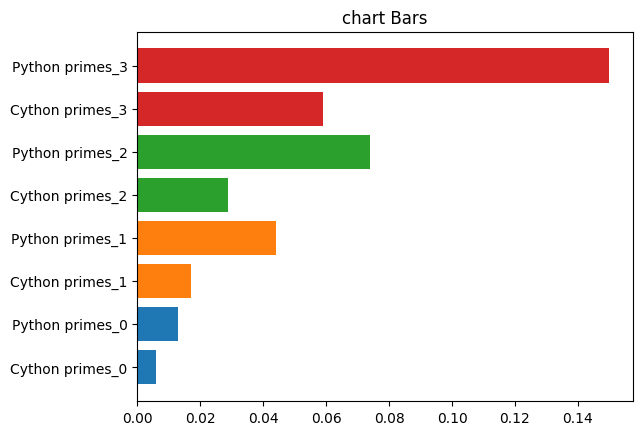

In [11]:
tester.plot(filename)

We can still observe an improvement in performance whilse using Cython, altough it is not as significative as with the Neural Network algorithm.

# Proof Of Work

In [13]:
from Fast.POW import POW as cPOW
from Pure.POW import POW as pPOW

In [14]:
#timeit(cfind_primes, 10000000)
filename = f"results/resultPOW{str(time.time())}.json"

cb = Binder(cPOW, name="Cython POW")
pb = Binder(pPOW, name="Python POW")
tester = Tester([cb, pb])
tester.test(loads=[(["ポケモン".encode(), 2**250], {}),
                    (["ポケモン".encode(), 2**240], {}),
                   (["ポケモン".encode(), 2**238], {}),
                  (["ポケモン".encode(), 2**235], {})],
                    show_names = ["2**250","2**240","2**238","2**235"],
            iters = 1, save_to_file = filename)

[{'Cython POW_2**250': [0.0], 'Python POW_2**250': [0.0009999275207519531]},
 {'Cython POW_2**240': [0.09599971771240234],
  'Python POW_2**240': [0.10599899291992188]},
 {'Cython POW_2**238': [0.3719487190246582],
  'Python POW_2**238': [0.4080014228820801]},
 {'Cython POW_2**235': [4.2262282371521],
  'Python POW_2**235': [4.747999668121338]}]

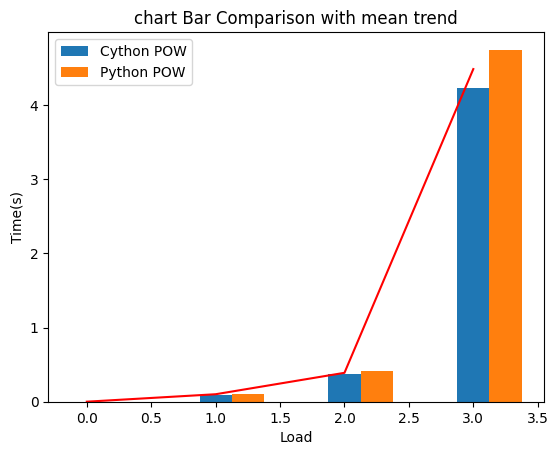

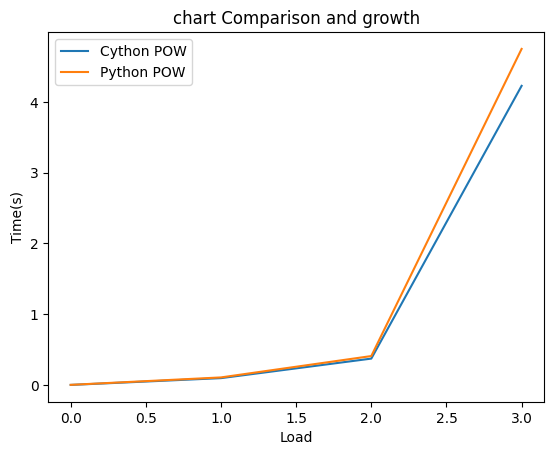

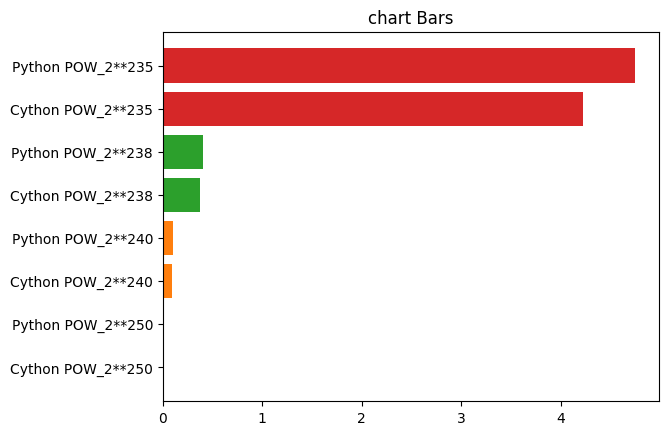

In [15]:
tester.plot(filename)

Behnel, S., Bradshaw, R., Citro, C., Dalcin, L., Seljebotn, D. S., & Smith, K. (2011). Cython: The Best of Both Worlds. Computing in Science & Engineering, 13(2), 31–39. doi:10.1109/mcse.2010.118 